## Gather data

In [10]:
# import necessary packages. we may need more later, but we will start with these 3.
import requests
import pandas as pd
import numpy as np

In [11]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
tweet_ids_list = list(df_twitter_archive.tweet_id) # read in csv and create a list of tweet ids

In [12]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url) 
# do a get request, which takes in an http request url (string)
with open('image_predictions.tsv', mode='wb') as file: 
# with open opens a file in file system, the mode is write bytes because this .tsv is being read as bytes type
    file.write(response.content) # writing content from the http request to a file
df_images_preds = pd.read_csv('image_predictions.tsv', sep='\t') # reading in .tsv file with separator as '\t'

In [14]:
# import tweepy
# import json

# consumer_key = 'NtjyAuOPpD4eoFYjHHcPBegHb'
# consumer_secret = 'QOudMd40CxQZp8aCOIyJXLz1PSyQkpnaanyh6hWcNdmViF3XQj'
# access_token = '1256694316841480193-BSV5SyjXZJi82scedZC0b7LXCwVzLb'
# access_secret = 'RZxmo2YnDOMflF9fwPWsF0dVfa68cmiw8Mx2P40jsp4at'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# # then after we get the tweet_status we use json.dumps to turn tweet_status (which is of json type) into string type, so we can write to the tweet_json file. 

# with open('tweet_json.txt', mode="w") as file: # here we are opening the tweet_json file, with mode w, and assigning to "file"    
#     request_list = []
#     for tweet in tweet_ids_list:
#         try:
#             tweet_status = api.get_status(tweet) # then we are doing a get_status with the ids
#             # Grab only the keys we want
#             final_result = {k:v  for k, v in tweet_status._json.items() if k in ['id','retweet_count', 'favourite_count',  'favorite_count']}
#             request_list.append(final_result) # Append the result to the request_list
#         except Exception as e:
#         # If any error happens, we want to catch, so it doesn't break the loop
#             print(e)
#             # When I finish doing all the requests, I want to write that list into my file so I can access later
#     file.write(str(request_list))

[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status fou

In [15]:
import tweepy
import json
# With the content saved in a file, now it's easy to just run this part and get the data.
with open('tweet_json.txt') as file:
    line = file.readline()
    line2 = line.replace('\'', '\"') # replace ' with " so it can understand JSON.
    json_version = json.loads(line2) # Transform the str to JSON
    # use the json_version and create a DataFrame
    df_tweepy = pd.DataFrame(json_version, columns=['id', 'retweet_count', 'favorite_count'])  

In [16]:
for key in list(df_tweepy.id): # double check that a random key from df_twitter_archive exists in df_tweepy
    if key == 720043174954147842:
        print('Key is here.')

Key is here.


## Assess data

>First I assess the data visualy by having a look at random samples of each of the dataframes to see what information is present, and see where improvements could be made/cleaning could be performed.

In [17]:
df_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
997,748324050481647620,NaN,NaN,2016-06-30 01:15:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He permanently looks like he jus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748324050...,11,10,Duke,None,None,None,None
2313,666739327293083650,NaN,NaN,2015-11-17 22:06:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lugan. He is a Bohemian Rhapsody. Very...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666739327...,10,10,Lugan,None,None,None,None
594,798705661114773508,NaN,NaN,2016-11-16 01:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Baloo. He's expecting a fa...,7.406770e+17,4.196984e+09,2016-06-08 22:48:46 +0000,https://twitter.com/dog_rates/status/740676976...,11,10,Baloo,None,None,pupper,None
820,770414278348247044,NaN,NaN,2016-08-30 00:14:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Al Cabone. He's a gangsta puppa. Rather h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770414278...,11,10,Al,None,None,None,None
681,788765914992902144,NaN,NaN,2016-10-19 15:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Butter. She can have whatever she want...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788765914...,12,10,Butter,None,None,None,None


In [18]:
df_images_preds.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1428,772826264096874500,https://pbs.twimg.com/media/CrmhYYIXEAEcyYY.jpg,1,basset,0.915351,True,Walker_hound,0.072416,True,beagle,0.008229,True
1536,790581949425475584,https://pbs.twimg.com/media/Cvi2FiKWgAAif1u.jpg,2,refrigerator,0.998886,False,malinois,0.000153,True,kelpie,0.000131,True
23,666345417576210432,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,1,golden_retriever,0.858744,True,Chesapeake_Bay_retriever,0.054787,True,Labrador_retriever,0.014241,True
1264,749064354620928000,https://pbs.twimg.com/media/CmU2DVWWgAArvp3.jpg,2,pug,0.985222,True,Brabancon_griffon,0.003314,True,Pekinese,0.002989,True
825,693262851218264065,https://pbs.twimg.com/media/CZ724fDUYAAytS-.jpg,1,golden_retriever,0.989333,True,Labrador_retriever,0.007946,True,kuvasz,0.000749,True


In [19]:
df_tweepy.sample(5)

,id,retweet_count,favorite_count
2079,670668383499735048,4815,10314
881,758355060040593408,1089,3430
851,761334018830917632,1465,5243
1570,686377065986265092,568,2210
1937,673355879178194945,554,1457


>Then I assess the data programmatically, using .info, which shows how many columns/rows there are, what data type the columns have, if there are columns missing values, the names of the columns, and so on.

In [20]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
df_images_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df_tweepy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


### Messy data issues

#### Assess

1. Dog stage in more than 1 column.
2. There are different numbers of rows in each dataframe.

#### Define

1. Collapse the different dog stage columns into 1 column.
2. Assess each df to determine which rows are shared across all 3 dataframes, and cut rows that are not shared across all 3 by merging.

### Dirty data issues

#### Assess

1. There are retweets along with original tweets, and there may be some without images.
2. The tweet id columns have different names across the 3 dfs.
3. Tweet id is integer type instead of string in all 3 dfs.
4. There are columns that have unnecessary information for the data analysis I will complete.
5. Dog names with words like "quite", "a", "an", "the"
6. Timestamps as object, dog type as object.
7. Some of the ratings denominator/numerator columns have strange values (denominators larger than 10 for example).
8. The links included in the tweet texts are duplicated, we already have these in the original df.

#### Define

1. Remove rows that are retweets (have non NaN values in retweeted_status_id column), and check if there are any rows without images in the image predictions df.
2. Rename the tweet id column in the image predictions df so that we can merge the 3 dfs together, making it easier to work with the data moving forward.
3. Change tweet id from integer type to string in all 3 dfs.
4. Drop columns that will not be needed in data analysis to make handling the data easier.
5. Remove words like "quite", "a", "an", "the" in the dog name column, we will not be able to recover these names.
6. Change data types so that they make sense: timestamp as date time, dog stage as category.
7. Replace ratings denominator/numerator columns that have strange values (such as denominators larger than 10) with NaN.
8. Remove url from tweet text, as we already have this link in the original dataframe. Then we will have clean, shorter text.

## Clean data

#### Messy data issue #1: Dog stage in more than 1 column.

Code:

In [104]:
df_archive_clean = df_twitter_archive.copy()
df_img_pred_clean = df_images_preds.copy()
df_tweepy_clean = df_tweepy.copy() # making copies of original dataframes

In [105]:
dog_stage = []
# We want to find in the text column the dog stages, and put this information into a new dog stage column 
for search_text in df_archive_clean['text']:
    for dog in ['pupper', 'puppo', 'doggo', 'floof']: # we use a loop to loop through text in each row looking for dog stages
        if dog in str(search_text.lower()): 
            # we want to lowercase the text so we are able to find all stages, and not miss some that may be uppercase
            dog_stage.append(dog)
            # we append dog value (pupper, puppo, etc.) to the dog_stage list
            break # if we find it, we break, if we do not, we append the word None
    else:
        dog_stage.append('None')
        
df_archive_clean['dog_stage'] = dog_stage # create a dog stage column with dog_stage list values

In [106]:
df_archive_clean['dog_stage'].value_counts()

None      1905
pupper    283 
doggo     93  
puppo     38  
floof     37  
Name: dog_stage, dtype: int64

In [107]:
df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True) 
# we drop the unnecessary/extra columns leaving only dog_stage

Test:

In [108]:
df_archive_clean.info() # new column is there, old columns have been dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


#### Dirty data issue #1: There are retweets along with original tweets, and there may be some without images.

Code:

In [109]:
# We make the assumption that if a row has a value in the retweet status id column, it means it is a retweet.

# We run isna on retweet status column to see where the null values are, and also so we change the values to true or false (is or is not na)
df_archive_clean.retweeted_status_id = df_archive_clean.retweeted_status_id.isna()

# Drop the values that are False, meaning they are retweets, because they have a value.
df_archive_clean.drop(df_archive_clean[df_archive_clean.retweeted_status_id == False].index, inplace=True)

In [110]:
# After dropping the retweets, we look to see if there are any non-images in the jpg url column in df_img_pred_clean.

count = 0 # we want to track count of .jpgs in jpgurl column / list those that aren't jpgs
not_jpgs = []
for img in df_img_pred_clean.jpg_url:
    if img.find('.jpg') == -1: # if substring doesn't exist inside the string, it returns -1.
        not_jpgs.append(img) # append to not jpgs
    else:
        count += 1 # in order to get total number of jpgs
        
print(count)
print(not_jpgs)

# there are 2 files that are not jpgs but are still image files (pngs), so we leave these alone

2073
['https://pbs.twimg.com/tweet_video_thumb/CVKtH-4WIAAmiQ5.png', 'https://pbs.twimg.com/tweet_video_thumb/CZ0mhduWkAICSGe.png']


Test:

In [111]:
# above we had 2356 rows in df_archive_clean, let's check to make sure the rows above were dropped.
df_archive_clean.shape
# we now have 2175, so clearly the this was successful

(2175, 14)

#### Dirty data issue #2: The tweet id columns have different names across the 3 dfs.

Code:

In [112]:
# Rename to tweet_id so we can join the 3 dataframes
df_tweepy_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

Test:

In [113]:
df_tweepy_clean.columns
# we can see that the column name has changed

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

#### Dirty data issue #3: Tweet id is integer type instead of string in all 3 dfs.

Code:

In [114]:
df_archive_clean.tweet_id = df_archive_clean.tweet_id.astype(str)
df_img_pred_clean.tweet_id = df_img_pred_clean.tweet_id.astype(str)
df_tweepy_clean.tweet_id = df_tweepy_clean.tweet_id.astype(str)

Test:

In [115]:
type(df_archive_clean.tweet_id[0])

str

In [116]:
type(df_img_pred_clean.tweet_id[0])

str

In [117]:
type(df_tweepy_clean.tweet_id[0])

str

All tweet ids have been changed to str.

#### Messy data issue #2: There are different numbers of rows in each dataframe.

Code:

In [118]:
# Merging 3 dfs together with an inner join, so that they will share the same number of rows/same ids.
df_merged_result = pd.merge(df_archive_clean, df_tweepy_clean, how = 'inner', on = 'tweet_id')                        
df_merged_result = pd.merge(df_merged_result, df_img_pred_clean, how = 'inner', on = 'tweet_id')

Test:

In [119]:
df_merged_result.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1174,692752401762250755,NaN,NaN,2016-01-28 16:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Hello yes could I get one pupper to go please thank you""\nBoth 13/10 https://t.co/kYWcXbluUu",True,NaN,NaN,https://twitter.com/dog_rates/status/692752401762250755/photo/1,...,1,Samoyed,0.471276,True,Siberian_husky,0.15885,True,Eskimo_dog,0.138672,True


In [120]:
df_merged_result.shape # we have successfully dropped rows

(1987, 27)

In [121]:
df_merged_result.duplicated().sum() # no duplicate values in the new df

0

#### Dirty data issue #4: There are columns that have unnecessary information for the data analysis I will complete.

Code:

In [122]:
columns_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'jpg_url', 'img_num']
merged_clean_result = df_merged_result.drop(columns_to_drop, axis=1)

Test:

In [123]:
merged_clean_result.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'retweet_count',
       'favorite_count', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog',
       'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [124]:
merged_clean_result.shape # we dropped 9 columns

(1987, 18)

#### Dirty data issue #5: Dog names with words like "quite", "a", "an", "the"

Code:

In [125]:
dog_names = merged_clean_result.name.unique() # we want to have a look at all of the unique names in the name column
np.sort(dog_names)[::-1] # we use numpy sort to sort these z-a, and see lowercase "names" at the top

array(['very', 'unacceptable', 'this', 'the', 'such', 'space', 'quite',
       'one', 'officially', 'not', 'my', 'light', 'just', 'infuriating',
       'incredibly', 'his', 'getting', 'by', 'an', 'all', 'actually', 'a',
       'Zuzu', 'Zooey', 'Zoey', 'Zoe', 'Ziva', 'Zeus', 'Zeke', 'Zeek',
       'Zara', 'Yogi', 'Yoda', 'Wyatt', 'Wishes', 'Winston', 'Winnie',
       'Winifred', 'Wilson', 'Willy', 'Willow', 'Willie', 'William',
       'Willem', 'Wiggles', 'Wesley', 'Watson', 'Walter', 'Wally',
       'Wallace', 'Walker', 'Waffles', 'Wafer', 'Vixen', 'Vinscent',
       'Vinnie', 'Vincent', 'Vince', 'Venti', 'Ulysses', 'Tyrus', 'Tyrone',
       'Tyr', 'Tycho', 'Tupawc', 'Tug', 'Tuco', 'Tucker', 'Tuck',
       'Trooper', 'Tripp', 'Trip', 'Trigger', 'Trevith', 'Traviss',
       'Travis', 'Tove', 'Torque', 'Tonks', 'Tommy', 'Tom', 'Toffee',
       'Todo', 'Toby', 'Tobi', 'Tito', 'Titan', 'Tino', 'Timofy', 'Timmy',
       'Timison', 'Timber', 'Tilly', 'Tiger', 'Thumas', 'Thor', 'Theodore',
  

In [126]:
missing_names = merged_clean_result[merged_clean_result.name.str.contains('^[a-z]|None')] 
# want to find names in the name column that start with a lowercase letter, as this is likely a word and not a proper name
merged_clean_result['name'] = merged_clean_result['name'].replace(missing_names['name'].tolist(),np.NaN)
# as we do not have a way to recover the missing dog names, we replace the words that are not names with NaN instead

Test:

In [127]:
merged_clean_result[merged_clean_result['name'] == 'unacceptable'] # check to see if it worked

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### 6. Change data types so that they make sense: tweet id to string, timestamp as date time, dog stage as category.

Code:

In [128]:
merged_clean_result.timestamp = pd.to_datetime(merged_clean_result.timestamp)
merged_clean_result.dog_stage = merged_clean_result.dog_stage.astype('category')

Test:

In [129]:
merged_clean_result.info() # all of the data types look good now!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 18 columns):
tweet_id              1987 non-null object
timestamp             1987 non-null datetime64[ns]
text                  1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1343 non-null object
dog_stage             1987 non-null category
retweet_count         1987 non-null int64
favorite_count        1987 non-null int64
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null bool
p2                    1987 non-null object
p2_conf               1987 non-null float64
p2_dog                1987 non-null bool
p3                    1987 non-null object
p3_conf               1987 non-null float64
p3_dog                1987 non-null bool
dtypes: bool(3), category(1), datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 240.8+ KB


#### Dirty data issue #7 Some of the ratings denominator/numerator columns have strange values (denominators larger than 10 for example).

Code:

In [130]:
merged_clean_result.rating_denominator[merged_clean_result.rating_denominator!=10]
# We look for all values in the denominator column that are not 10 (10 is the rule of thumb for denominators in WeRateDogs)

319     70 
381     7  
657     150
794     11 
842     170
885     20 
919     50 
940     90 
964     80 
982     50 
1048    50 
1124    40 
1296    130
1297    110
1322    11 
1428    120
1487    80 
1966    2  
Name: rating_denominator, dtype: int64

In [131]:
pd.set_option('display.max_colwidth', -1) # we want to see the whole length of a sample text

In [132]:
merged_clean_result[merged_clean_result['rating_denominator'] == 90].text 
# sample text, where we see rating is given as 99/90, which is not a "valid" rating, denominator should be 10

940    Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
Name: text, dtype: object

In [133]:
# we find the indexes of all rows where the denominator does not equal 10
index_not_10s = merged_clean_result.rating_denominator[merged_clean_result.rating_denominator != 10].index

In [134]:
# we then locate these rows, and change the denominator/numerator values to NaN as they are not valid ratings/would skew analysis
merged_clean_result.loc[index_not_10s, 'rating_denominator'] = np.NaN
merged_clean_result.loc[index_not_10s, 'rating_numerator'] = np.NaN

Test:

In [135]:
# search the above example again and see that it is no longer there
merged_clean_result[merged_clean_result['rating_denominator'] == 90]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Dirty data issue #8: Remove url from tweet text, as we already have access to this link in the original dataframe.

Code:

In [136]:
merged_clean_result.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,None,7725,36300,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [137]:
# Import re package to make it easier to work with regular expressions
import re

# create a function to remove the url links from given string
def remove_link(link_str): # link_str is the given string
    return re.sub(r'http\S+', '', link_str) # .sub extracts r'http\S+' (regex to find http request) from link_str

# apply the remove_link function and save the result to the current text column
merged_clean_result['text'] = merged_clean_result['text'].apply(remove_link)

Test:

In [138]:
# Check result is correct
merged_clean_result.text.head()

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10                                                      
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
2    This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10                  
3    This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us                                                            
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek 
Name: text, dtype: object

### Save new dataframe to a csv file

Code:

In [139]:
merged_clean_result.to_csv('twitter_archive_master.csv', index=False)

Test:

In [140]:
test_new_csv = pd.read_csv('twitter_archive_master.csv') # looks good!
test_new_csv.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13.0,10.0,Phineas,None,7725,36300,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13.0,10.0,Tilly,None,5719,31305,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12.0,10.0,Archie,None,3786,23571,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13.0,10.0,Darla,None,7888,39602,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12.0,10.0,Franklin,None,8506,37816,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Acting on Wrangled Data

#### Insight #1: Which dog stage is the most common, and does the dog stage seem to have a correlation with the number of retweets?

>Steps:<br>1. Check out value counts to see if certain stages are more common than others.<br>2. Look at the average number of retweets for each dog stage using groupby.<br>3. Plot this information in a bar graph to more clearly show comparisons. The graph should be sorted from most retweets to least, with dog stage on the x-axis and total retweets on the y-axis.

In [141]:
merged_clean_result.dog_stage.value_counts()

None      1620
pupper    237 
doggo     68  
floof     34  
puppo     28  
Name: dog_stage, dtype: int64

In [142]:
mean_retweets_dogstage = merged_clean_result.groupby('dog_stage').retweet_count.mean().reset_index('dog_stage')
# using groupby to see the mean retweet_count for each dog_stage
mean_retweets_dogstage

,dog_stage,retweet_count
0,None,2296.327160
1,doggo,6181.926471
2,floof,2547.205882
3,pupper,2102.080169
4,puppo,6032.321429


In [143]:
df_sorted_desc = mean_retweets_dogstage.sort_values('retweet_count', ascending=False).reset_index(drop=True)
# sorting the retweet count descending in order to graph in order from highest to lowest.
# reseting index and setting drop to true, so that we do not end up with an extra column.
df_sorted_desc

,dog_stage,retweet_count
0,doggo,6181.926471
1,puppo,6032.321429
2,floof,2547.205882
3,None,2296.327160
4,pupper,2102.080169


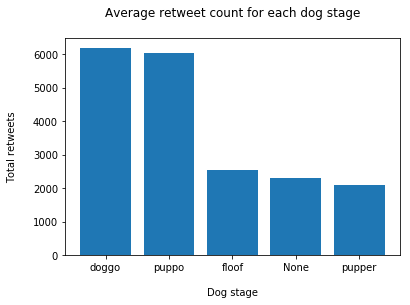

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline

locations = [0, 1, 2, 3, 4]
heights = [df_sorted_desc.retweet_count[0], df_sorted_desc.retweet_count[1], df_sorted_desc.retweet_count[2], 
           df_sorted_desc.retweet_count[3], df_sorted_desc.retweet_count[4]]
labels = ['doggo', 'puppo', 'floof', 'None', 'pupper']
plt.bar(locations, heights, tick_label=labels)
plt.title("Average retweet count for each dog stage\n")
plt.xlabel("\nDog stage")
plt.ylabel("Total retweets\n");

Conclusions:<br>
>Doggo and puppo have significantly higher average retweet counts than floof, pupper, or tweets not including the dog stage (none), more than double the retweet count. It seems tweets mentioning the dog's stage are more likely to be retweeted. 

#### Insight #2: Is there a correlation between the rating numerator and number of favorites?

>Steps:<br>1. Use groupby for the rating numerator to find the number of favorites for each numerator.<br>2. Plot the rating numerator and number of favorites in a scatterplot, with rating numerator on the x-axis and number of favorites on the y-axis.<br>3. Look at the correlation coeffecient in order to compare the 2 statistically.

In [148]:
mean_favorites_num = merged_clean_result.groupby('rating_numerator').favorite_count.mean().reset_index('rating_numerator')
mean_favorites_num.tail()

,rating_numerator,favorite_count
15,26.0,1713.0
16,27.0,6659.0
17,75.0,18649.0
18,420.0,23818.0
19,1776.0,5150.0


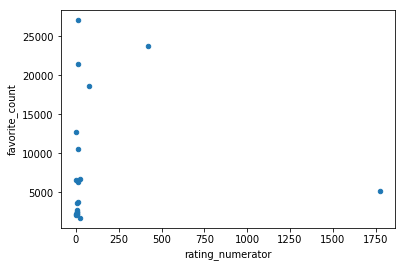

In [149]:
# Looking at rating_numerator and favorite_count in a scatterplot
mean_favorites_num.plot(x="rating_numerator", y="favorite_count", kind="scatter");

In [147]:
# this really doesn't show us much! let's see how this looks if we were to remove the 2 largest values
less_means_faves_num = mean_favorites_num.drop(mean_favorites_num[mean_favorites_num.rating_numerator >= 420.0].index)
less_means_faves_num.tail()

,rating_numerator,favorite_count
13,13.0,21455.607004
14,14.0,27065.342857
15,26.0,1713.000000
16,27.0,6659.000000
17,75.0,18649.000000


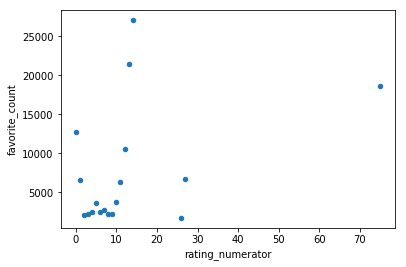

In [150]:
# looking at the scatterplot again after dropping the 2 major outliers of 420 and 1776
less_means_faves_num.plot(x="rating_numerator", y="favorite_count", kind="scatter");

The scatterplot unfortunately still does not show us too much: it seems there is a very strong correlation between these 2 variables. Let's take a quick look at the correlation coeffecient to determine correlation.

In [151]:
np.corrcoef(mean_favorites_num.rating_numerator, mean_favorites_num.favorite_count)

array([[ 1.       ,  0.0293741],
       [ 0.0293741,  1.       ]])

In [152]:
np.corrcoef(less_means_faves_num.rating_numerator, less_means_faves_num.favorite_count)

array([[ 1.        ,  0.39360188],
       [ 0.39360188,  1.        ]])

Conclusions:<br>
>A strong correlation coeffecient is generally considered to be greater than or equal to 0.7, while moderate is between 0.3 and 0.7 and weak is between 0 and 0.3 (either positive or negative, depending on whether the correlation is positive or negative).<br><br>The correlation coeffecient for these 2 variables, before dropping any values is ≈ 0.029, and after dropping ≈ 0.39. Before dropping these 2 large outliers, the correlation is very weak and positive. After dropping these values, the correlation coeffecient suggests a moderate, positive correlation.

#### Insight #3: For how many tweets was the neural network unable to determine that the image was of a dog? Did these images have fewer retweets than those in which a dog type was identified in the first go?

>Steps:<br>1. Find for how many tweets was the neural network unable to recognize that an image was of a dog on the first try.<br>2. Look to see if there is a correlation between retweets/favorites and identifying the image is of a dog, by comparing the average number of retweets/favorites for both.

In [310]:
merged_clean_result.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13.0,10.0,Phineas,None,7726,36298,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [311]:
merged_clean_result.p1_dog.value_counts()

True     1470
False    517 
Name: p1_dog, dtype: int64

In [312]:
p1dog_retweet_mean = merged_clean_result.groupby('p1_dog').retweet_count.mean().reset_index('p1_dog')
p1dog_retweet_mean

,p1_dog,retweet_count
0,False,2443.512573
1,True,2470.801361


It is clear to see that this had almost no effect on retweet count, as there is only a difference of 27 retweets between true and false. Let's have a quick look at favorites too.

In [313]:
p1dog_fave_mean = merged_clean_result.groupby('p1_dog').favorite_count.mean().reset_index('p1_dog')
p1dog_fave_mean

,p1_dog,favorite_count
0,False,7404.551257
1,True,8611.938095


Here are these differences plotted in a stacked bar chart.

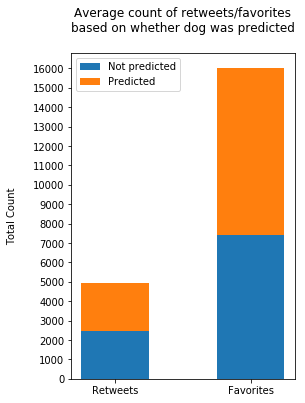

In [315]:
N = 2 # we want 2 bars in total
ind = np.arange(N) # arranges bars in N order.
not_predicted = (p1dog_retweet_mean.retweet_count[0], p1dog_fave_mean.favorite_count[0])
predicted = (p1dog_retweet_mean.retweet_count[1], p1dog_fave_mean.favorite_count[1])
# not_predicted and predicted = variables to include for the stacked bars 
width = 0.50 # width of bars
plt.figure(figsize=(4, 6)) # size of graph
p1 = plt.bar(ind, not_predicted, width) # components of each part of stacked bar
p2 = plt.bar(ind, predicted, width, bottom=not_predicted) # bottom: we want not_predicted at the bottom of stack

plt.ylabel('Total Count\n')
plt.title('Average count of retweets/favorites\nbased on whether dog was predicted\n')
plt.xticks(ind, ('Retweets', 'Favorites'))
plt.yticks(np.arange(0, 17000, 1000)) # set minimum y-value as 0, maximum as 17000, in increments of 1000
plt.legend((p1, p2), ('Not predicted', 'Predicted'));

plt.show()

Conclusions:<br>
>We can see more clearly here that the difference is more significant between not predicted/predicted for favorites that retweets. This could suggest that tweets are more popular when the dog in the image is more clearly recognizable as a dog/when there are less background objects that may distract from the dog itself. 